#### PER-2020 - SIN-392 - Introdução ao Processamento Digital de Imagens 

# Aula 06c - Morfologia Matemática
## Prof. João Fernando Mari
-----

- Extração de fronteiras
- Afinamento
- Espessamento
- Esqueletos
- Poda

## Importando as bibliotecas necessárias

In [1]:
%matplotlib notebook
import numpy as np

from scipy import ndimage

from skimage import img_as_float, filters, morphology, data, measure
import matplotlib.pyplot as plt

## Construindo imagens simples

In [2]:
img_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=bool)

In [3]:
img_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 1, 0, 0, 0],
                  [0, 1, 1, 1, 1, 0, 0, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]], dtype=bool)

In [4]:
img_3a = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                   [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0]], dtype=bool)

In [5]:
# Igual a imagem img_4a, porém com o fundo expandido.
img_3b = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                   [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=bool)

In [6]:
img_4 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=bool)

In [7]:
img_5a = np.array([[1, 0, 0, 0, 0],
                   [0, 1, 1, 0, 0],
                   [0, 1, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]], dtype=bool)

In [8]:
img_5b = np.array([[0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 1, 1, 0, 0, 0],
                   [0, 0, 1, 1, 0, 0, 0],
                   [0, 0, 1, 1, 1, 0, 0],
                   [0, 0, 1, 1, 1, 0, 0],
                   [0, 1, 1, 1, 1, 1, 0],
                   [0, 1, 1, 1, 1, 1, 0],
                   [0, 1, 1, 1, 1, 1, 0],
                   [0, 1, 1, 1, 1, 1, 0],
                   [0, 1, 1, 1, 1, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0]], dtype=bool)

In [9]:
img_6 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
                  [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### Plotando as imagens

<IPython.core.display.Javascript object>


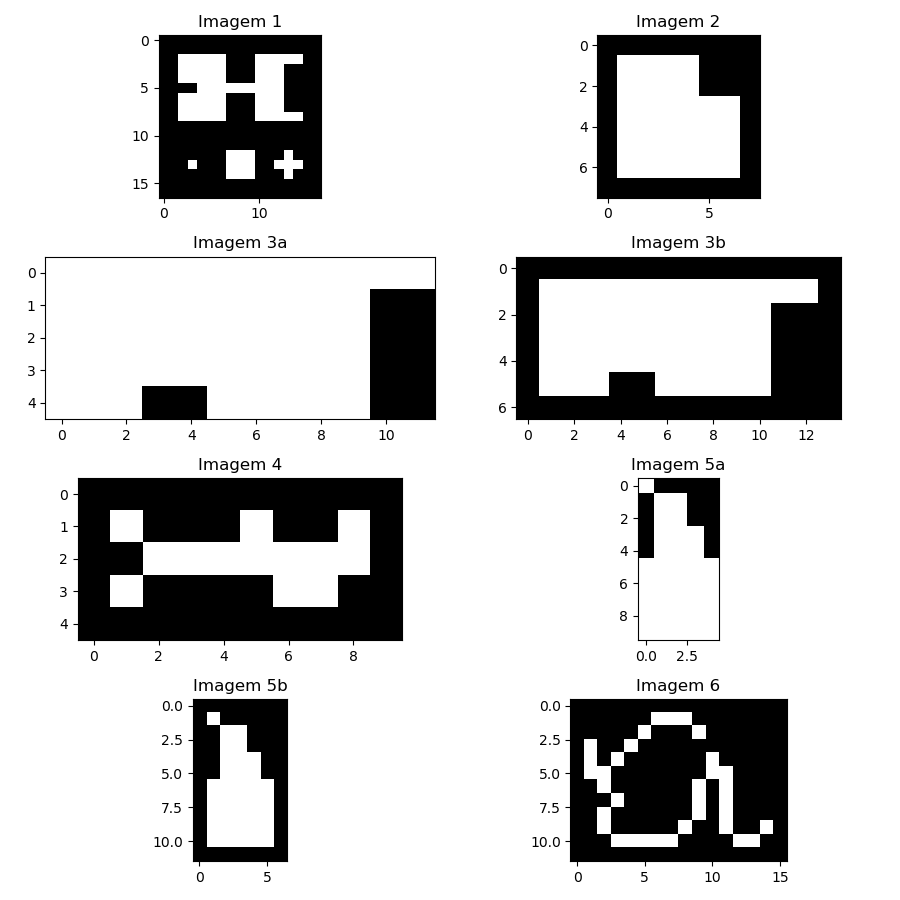

In [10]:
plt.figure(figsize=(9,9))

plt.subplot(4,2,1)
plt.imshow(img_1, cmap='gray')
plt.title('Imagem 1')
plt.subplot(4,2,2)
plt.imshow(img_2, cmap='gray')
plt.title('Imagem 2')
plt.subplot(4,2,3)
plt.imshow(img_3a, cmap='gray')
plt.title('Imagem 3a')
plt.subplot(4,2,4)
plt.imshow(img_3b, cmap='gray')
plt.title('Imagem 3b')
plt.subplot(4,2,5)
plt.imshow(img_4, cmap='gray')
plt.title('Imagem 4')
plt.subplot(4,2,6)
plt.imshow(img_5a, cmap='gray')
plt.title('Imagem 5a')
plt.subplot(4,2,7)
plt.imshow(img_5b, cmap='gray')
plt.title('Imagem 5b')
plt.subplot(4,2,8)
plt.imshow(img_6, cmap='gray')
plt.title('Imagem 6')

plt.tight_layout()
plt.show()

## Extração de fronteiras
----

- A fronteira de um conjunto A pode ser obtida subtraindo A erodido por B do conjunto original A: 

$\beta (A) = A − ( A \ominus B)$

In [11]:
img = img_2

# EE quadrado 3x3 gera bordas de objetos considerando 8-vizinhança.
ee = np.ones([3, 3])

img_bordas = np.logical_xor(img, morphology.binary_erosion(img, ee))

### Bordas com conectividade-4

- Ao utilizar um elemento estruturante quadrado 3x3 as bordas obtidas possuem conectividade-8.
- Deve-se alterar o elemento estruturante para cruz 3x3 para obter bordas com conectividade-4.

In [12]:
img = img_2

# EE em forma de cruz 3x3 gera bordas de objetos considerando 4-vizinhança.
ee_4 = np.array([[0, 1, 0],
                 [1, 1, 1],
                 [0, 1, 0]])

img_bordas_4 = np.logical_xor(img, morphology.binary_erosion(img, ee_4))

### Plotando as imagens

<IPython.core.display.Javascript object>


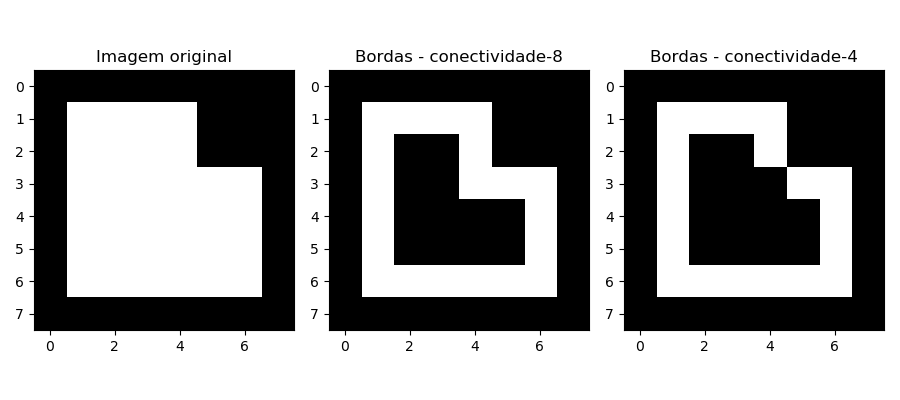

In [13]:
plt.figure(figsize=(9, 4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Imagem original')
plt.subplot(1,3,2)
plt.imshow(img_bordas, cmap='gray')
plt.title('Bordas - conectividade-8')
plt.subplot(1,3,3)
plt.imshow(img_bordas_4, cmap='gray')
plt.title('Bordas - conectividade-4')

plt.tight_layout()
plt.show()

## Afinamento
----

- O afinamento de um conjunto $A$ por um EE B é definido em termos da transformada <i>hit-or-miss<i>: \
$A \otimes B = A − (A \circledast B) = A \cap (A \circledast B)$ \
<br />
- O afinamento simétrico é baseado na sequencia de EEs: \
$\lbrace B \rbrace = \lbrace B^1, B^2, B^3,..., B^n \rbrace$ 
    - em que $B^i$ é uma versão rotacionada de $B^{i-1}$. \
<br />
- O afinamento por uma sequencia de EEs é definido por: \
$A \otimes {B} = ((…((A \otimes B^{1}) \otimes B^2 )…) \otimes B^n)$ \
<br />
- O processo consiste em afinar $A$ por $B^1$... 
    - Depois afinar o resultado por $B^2$... 
    - E assim por diante, até $B^n$. 
    - O processo é repetido até que não ocorram mais alterações. 

In [14]:
# Elemento estruturante inicial
ee_fg = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [1, 1, 1]])
ee_bg = np.array([[1, 1, 1],
                  [0, 0, 0],
                  [0, 0, 0]])

# Elemento estruturante inicial diagonal
ee_d_fg = np.array([[0, 0, 0],
                    [0, 1, 1],
                    [0, 1, 1]])
ee_d_bg = np.array([[1, 1, 0],
                    [1, 0, 0],
                    [0, 0, 0]])

# Gera duas listas com os 8 elementos estruturantes.
# Os demais EE são gerados rotacionando o EE e o EE diagonal 90 graus quatro vezes.
ee_fg_list = [ee_fg, ee_d_fg]
ee_bg_list = [ee_bg, ee_d_bg]

for i in range(3):
    # Rotaciona o EE inicial 90o, 4 vezes.
    ee_temp_fg = np.rot90(ee_fg_list[-2])
    ee_temp_bg = np.rot90(ee_bg_list[-2])
    # Insere na lista de EE's
    ee_fg_list.append(ee_temp_fg)
    ee_bg_list.append(ee_temp_bg)
    
    # Rotaciona o EE diagonal inicial 90o, 4 vezes.
    ee_temp_fg = np.rot90(ee_fg_list[-2])
    ee_temp_bg = np.rot90(ee_bg_list[-2])
    # Insere na lista de EE's
    ee_fg_list.append(ee_temp_fg)
    ee_bg_list.append(ee_temp_bg)

### Plotando os elementos estruturantes

<IPython.core.display.Javascript object>


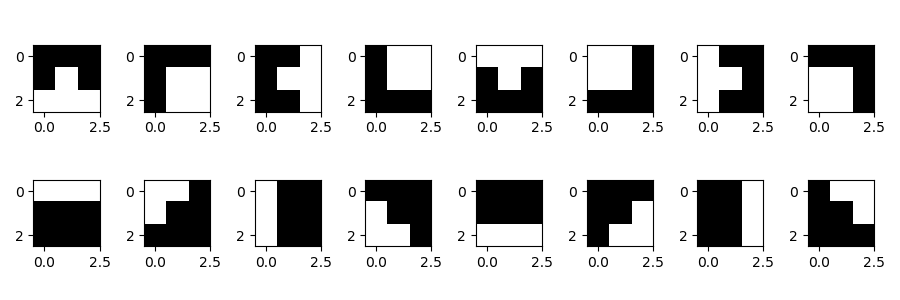

In [15]:
fig, ax  = plt.subplots(2, 8, figsize=(9, 3))

for i, (ee_fg_temp, ee_bg_temp) in enumerate(zip(ee_fg_list, ee_bg_list)):
    img_ = ax[0, i].imshow(ee_fg_temp, cmap='gray')
    img_ = ax[1, i].imshow(ee_bg_temp, cmap='gray')
    
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


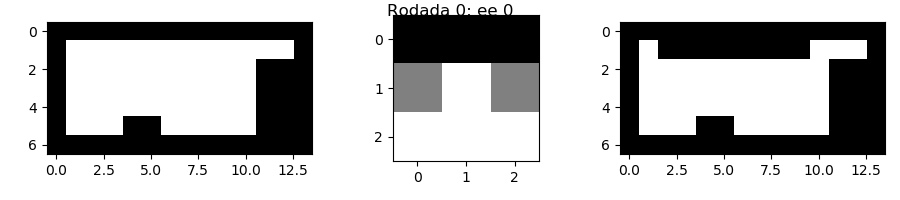

<IPython.core.display.Javascript object>


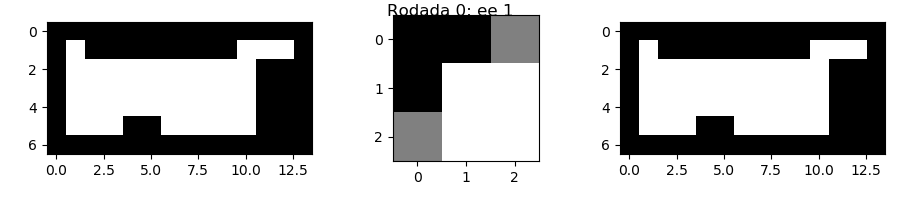

<IPython.core.display.Javascript object>


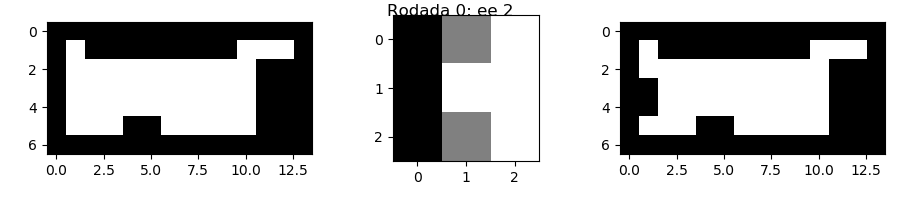

<IPython.core.display.Javascript object>


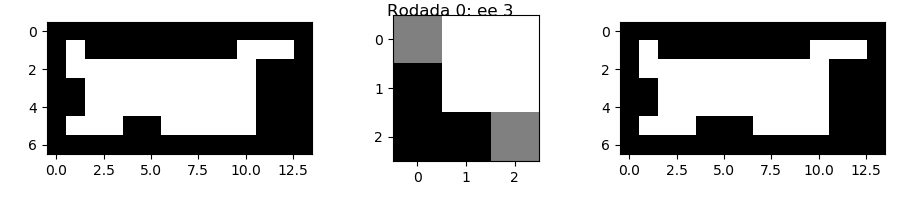

<IPython.core.display.Javascript object>


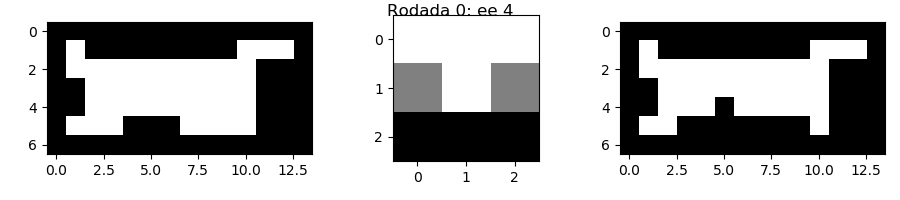

<IPython.core.display.Javascript object>


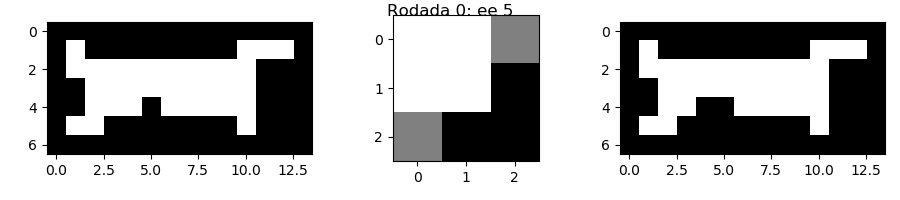

<IPython.core.display.Javascript object>


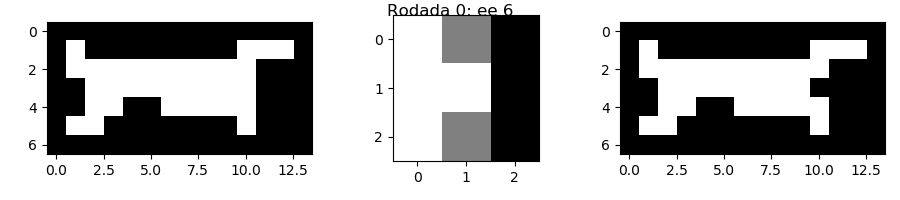

<IPython.core.display.Javascript object>


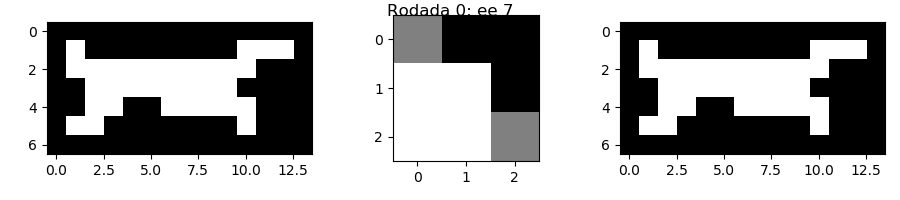

<IPython.core.display.Javascript object>


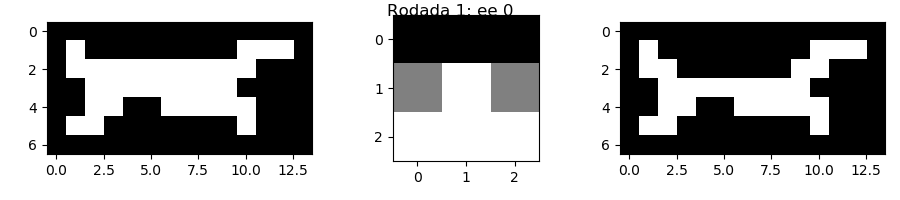

<IPython.core.display.Javascript object>


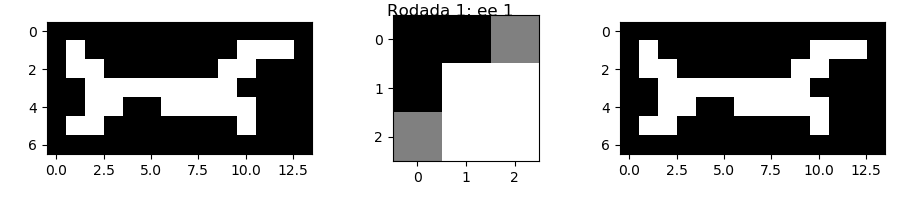

<IPython.core.display.Javascript object>


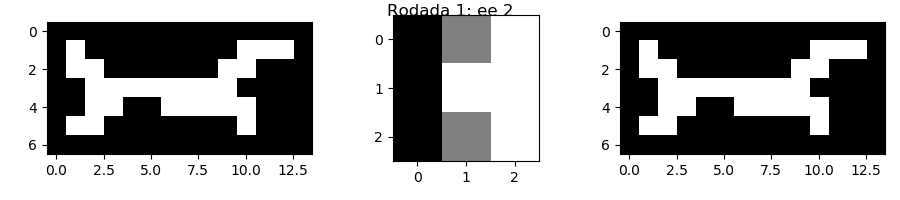

<IPython.core.display.Javascript object>


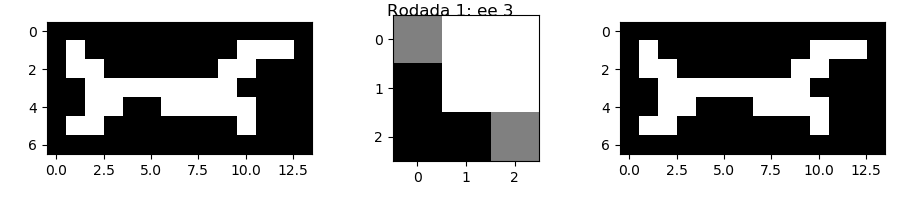

<IPython.core.display.Javascript object>


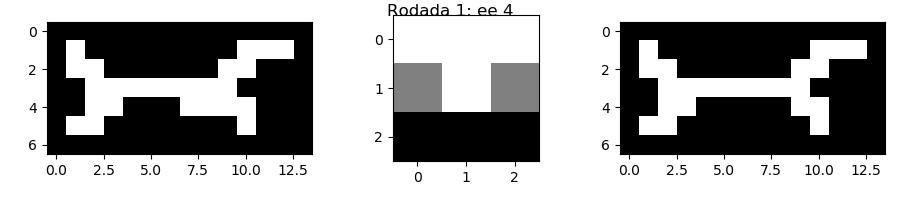

<IPython.core.display.Javascript object>


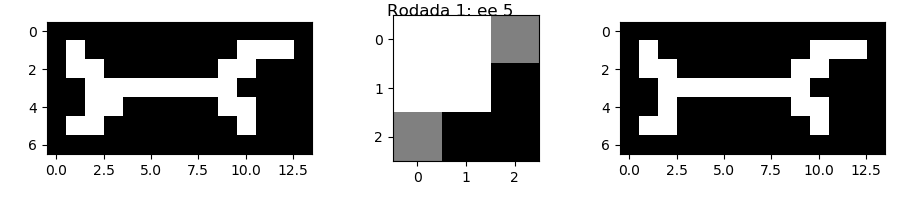

<IPython.core.display.Javascript object>


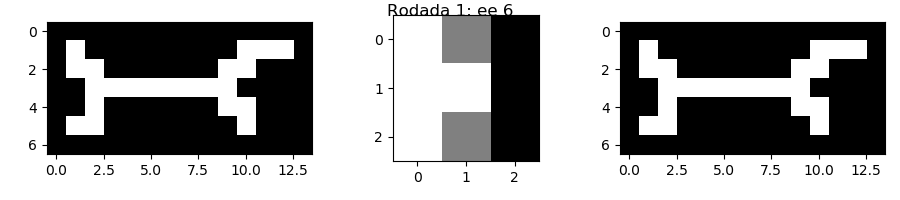

<IPython.core.display.Javascript object>


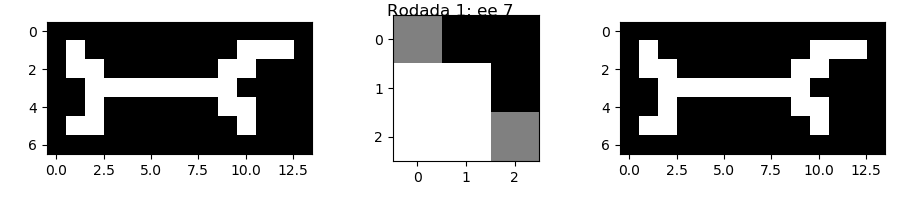

<IPython.core.display.Javascript object>


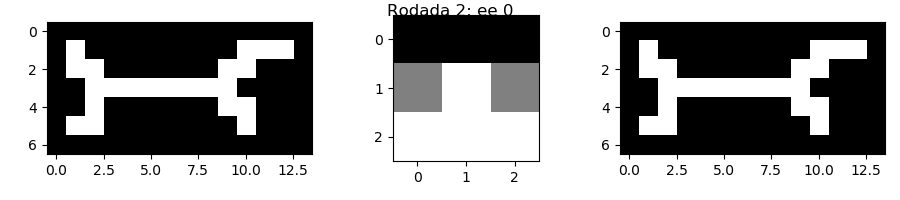

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


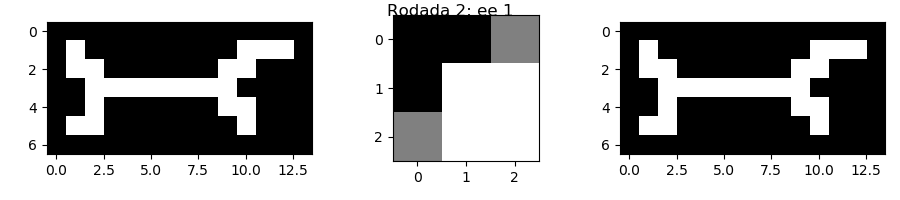

<IPython.core.display.Javascript object>


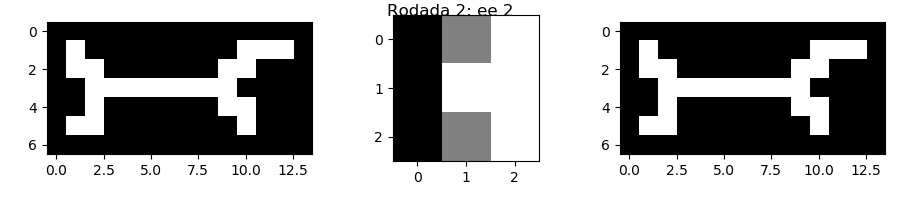

<IPython.core.display.Javascript object>


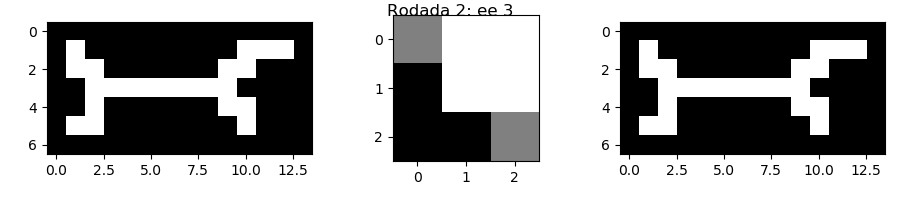

<IPython.core.display.Javascript object>


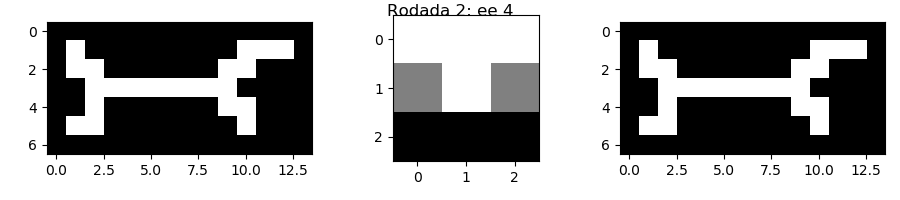

<IPython.core.display.Javascript object>


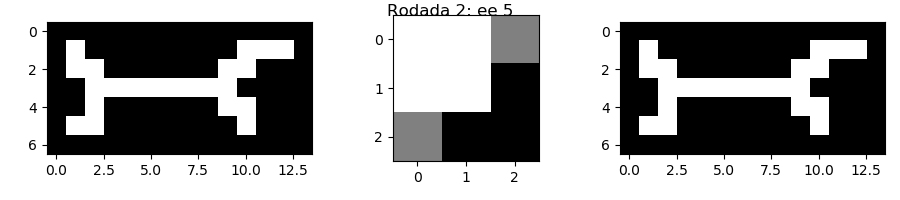

In [16]:
def afinamento(img, plot=True):
    """
    Implementação do algoritmo de afinamento morfológico baseado na descrição em [1].
    Com algumas adaptações.
    """
    # Inicializa a imagem afinada parcial com a imagem original
    img_afina_parc = img
    # Conta o número de iterações em que não ocorrem alteraçoes na imagem.
    # São utilizados oito elementos estruturantes.
    stop = 0
    # Contador de ciclos de processamento dos oito elementos estruturantes.
    i = 0
    while True:
        ### print('\n ' + str(i))
        for j, (ee_fg, ee_bg) in enumerate(zip(ee_fg_list, ee_bg_list)):
            img_afina_parc_temp = np.logical_xor(img_afina_parc, 
                        ndimage.binary_hit_or_miss(img_afina_parc, ee_fg, ee_bg))
            if plot: # Plota o resultado parcial, a cada iteração.
                # Versão unificada dos dois elementos estruturantes
                ee_vis = np.ones(ee_fg.shape) * 0.5
                ee_vis[ee_fg==1] = 1
                ee_vis[ee_bg==1] = 0
                # Plota as imagens
                plt.figure(figsize=(9, 2))
                plt.suptitle('Rodada %d: ee %d' % (i, j))
                plt.subplot(1,3,1)
                plt.imshow(img_afina_parc, cmap='gray')
                plt.subplot(1,3,2)
                plt.imshow(ee_vis, cmap='gray')
                plt.subplot(1,3,3)
                plt.imshow(img_afina_parc_temp, cmap='gray')
                plt.tight_layout()
                plt.show()
            if img_afina_parc_temp.sum() == img_afina_parc.sum():
                # Incrementa contagem de iterações sem alteração nas imagens
                stop = stop + 1
                # Uma sequencia de 8 elementos estruturantes.
                if stop >= 8: 
                    ### break
                    return img_afina_parc
            else:
                img_afina_parc = img_afina_parc_temp
                # Reinicia contagem.
                stop = 0
        # Incrementa o contador de ciclos.
        i = i + 1

# Aplica o afinamento 
# ----------------------------
img_afina = afinamento(img_3b)

## Espessamento
----

- O espessamento é o complemento morfológico do afinamento, definido como: \
$A \odot B = A \cup (A \circledast B)$ 
<br />
- E a operação sequencial é: \
$A \odot \lbrace B \rbrace = ((…((A \odot B^1 ) \odot B^2 )…) \odot B^n )$ 
    - São utilizados os mesmos EE que para o afinamento, porém os 1s e 0s são trocados.  
<br />
- Raramente aplica-se o espessamento diretamente.
    - É comum aplicar o afinamento sobre o complemento de $A$, $C = A^c$. 
        - <u>Motivo:</u> Tem-se, dessa forma, um limite para o processo de espessamento. 
    - Toma-se o complemento do resultado. 
    - Aplica-se um pós processamento para remover eventuais pontos desconectados. 

In [17]:
def espessamento(img_):
    """
    """
    # Obtém o complemento da imagem de entrada
    img_c = ~img_
    # Aplica o afinamento sobre o complemento da imagem
    img_afina = afinamento(img_c, False)
    # Obtém o complemento do resultado do afinamento
    img_espess = ~(img_afina.astype(bool))
    # Remove objetos não conectados ao objeto resultante do espessamento.
    img_espess_lbl = measure.label(img_espess)
    # Número total de objetos
    num_objs = img_espess_lbl.max()
    # Inicializa a imagem de saída
    img_espec_ok = np.zeros(img_espess.shape, dtype=bool)
     # Remove componentes desconectados.
    for label in range(num_objs):
        ### print('\nlabel = ' + str(label+1))
        # Constrói uma imagem temporária com um único objeto definido pelo rótulo atual
        img_temp = np.zeros(img_espess.shape, dtype=bool)
        img_temp[img_espess_lbl==label+1] = 1
        # Se a intersecção do objeto atual com o objeto original for difirente de vazio, 
        #    incluir o objeto na imagem de sáida.
        if np.logical_and(img_temp, img_).sum() >= 1:
            img_espec_ok[img_espess_lbl==label+1] = 1
    # Retorna a image de saída.
    return img_espec_ok

# Executa o espessamento
# -----------------------------
img_espec = espessamento(img_4)

### Plotando os resultados

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


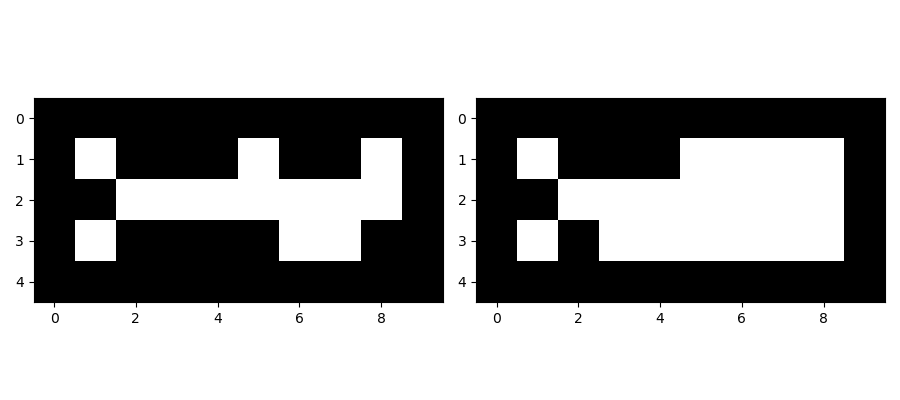

In [18]:
plt.figure(figsize=(9, 4))

plt.subplot(1,2,1)
plt.imshow(img_4, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_espec, cmap='gray')

plt.tight_layout()
plt.show()

## Esqueletos morfológicos
----

- O esqueleto, S(A) de um conjunto A pode ser definido por erosões e aberturas:
$S(A) = \bigcup\limits_{k=0}^{K}{S_k(A)}$
- Em que: \
$S_k(A) = (A \ominus kB) − (A \ominus kB) ∘ B$
    - B é o EE 
    - O k indica k erosões sucessivas de A por B. \
$(A \ominus kB)=((…((A \ominus B) \ominus B) \ominus …) \ominus B)$
- K é o último passo iterativo antes que A se torne um conjunto vazio: \
$K = max\lbrace k│(A \ominus kB) ≠ ∅ \rbrace$
- O esqueleto de $A$, $S(A)$, é obtido pela união dos subconjuntos do esqueleto, $S_k(A)$.

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


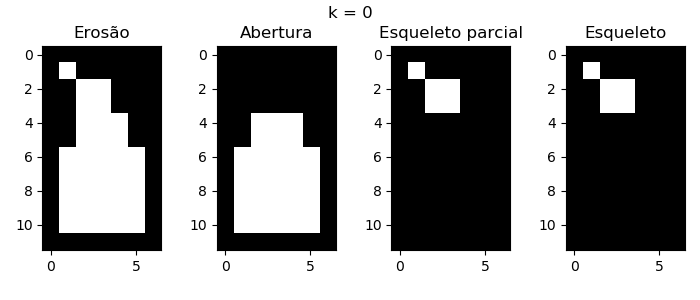

<IPython.core.display.Javascript object>


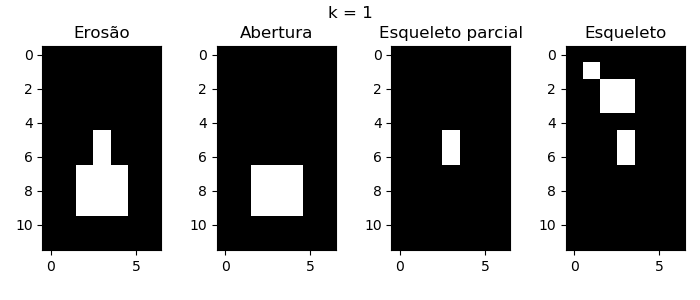

<IPython.core.display.Javascript object>


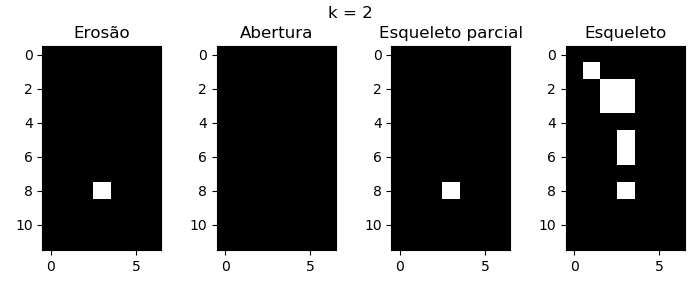

In [19]:
# ***** Seleciona a imagem *****
img = img_5b
# ******************************

# Elemento estruturante quadrado 3 x 3
ee = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])

# Inicializa a imagem do esqueleto
img_esq = np.zeros(img.shape, dtype=bool)

# Lista com os esqueletos parciais. Utilizado para reconstruir a forma original.
img_esq_list = []

# Conta o número de iterações do algoritmo.
# Importante para possibilitar reconstruir o objeto original a partir do esqueleto.
k = 0

# Inicializa a imagem resultante da erosão
# Obs.: k corresponde ao número de erosões sucessivas. Então quando k = 0, nenhuma erosão é aplicada.
img_erosion = img

while True:
    # Abertura da imagem erodida pelo EE.
    img_open = morphology.binary_opening(img_erosion, ee)
    # Imagem S - esqueleto parcial
    img_s = np.logical_xor(img_erosion, img_open)
    # Armazena os esqueletos parciais para possiblitar a reconstrução da forma original.
    img_esq_list.append(img_s)
    # Esqueleto parcial. Formado pela união das imagens S.
    img_esq = np.logical_or(img_esq, img_s)
    # Plota o resultado parcial a cada iteração
    plt.figure(figsize=(7, 3))
    plt.suptitle('k = ' + str(k))
    plt.subplot(1,4,1)
    plt.imshow(img_erosion, cmap='gray')
    plt.title('Erosão')
    plt.subplot(1,4,2)
    plt.imshow(img_open, cmap='gray')
    plt.title('Abertura')
    plt.subplot(1,4,3)
    plt.imshow(img_s, cmap='gray')
    plt.title('Esqueleto parcial')
    plt.subplot(1,4,4)
    plt.imshow(img_esq, cmap='gray')
    plt.title('Esqueleto')
    plt.tight_layout()
    plt.show()
    # Próxima erosão.
    k = k + 1
    # Erosão
    img_erosion_temp = morphology.binary_erosion(img_erosion, ee)
    # Se o conjunto desaparecer, então interromper o algoritmo e tomar o resultado da última iteração.
    if img_erosion_temp.sum() <= 0:
        break
    else:
        img_erosion = img_erosion_temp

### Reconstruíndo a forma original a partir do seu esqueleto morfológico

- É possível reconstruir $A$ a partir de $S(A)$ conhecendo o elemento estruturante e o valor de $k$. \
$A = \bigcup\limits_{k=1}^{K}{(S_k(A) \oplus kB)}$ 

- Em que $(S_{k}(A) \oplus kB)$ denota $k$ dilatações sucessivas de $S_k(A)$, ou seja:
$(S_{k} \oplus kB)=((...(S_{k}(A) \oplus B) + B ...) \oplus B)$

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


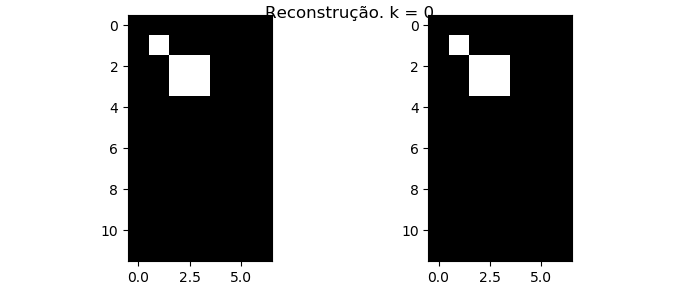

<IPython.core.display.Javascript object>


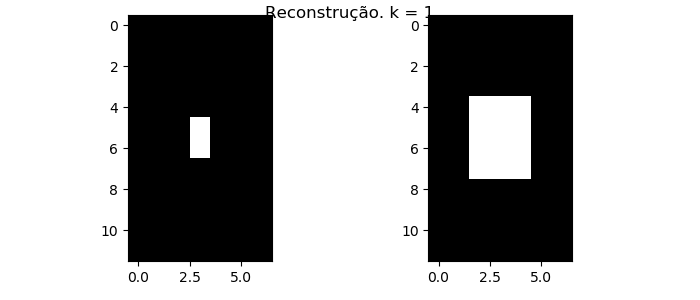

<IPython.core.display.Javascript object>


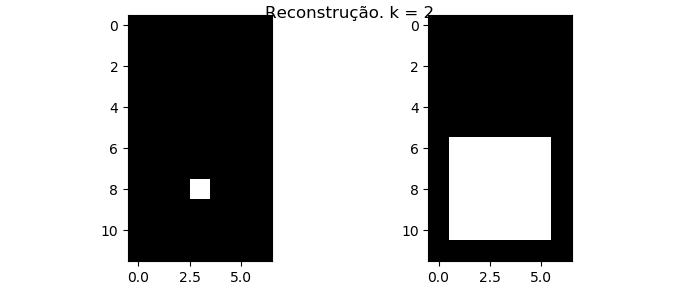

In [20]:
# Inicializa a imagem reconstruída com zeros.
img_rec = np.zeros(img.shape)
# Lista com as reconstruções parciais.
img_rec_list = []

for i, img_esq_parc in enumerate(img_esq_list):
    ### print(i)
    # Inializa a imagem reconstruída com uma cópia da imagem de esqueleto.
    img_rec_parc = np.array(img_esq_parc)
    # Executa i dilatações sucessivas.
    for k_ in range(i):
        img_rec_parc = morphology.binary_dilation(img_rec_parc, ee)
    # Insere o resultado parcial na lista
    img_rec_list.append(img_rec_parc)
    # Insere a reconstrução parcial na reconstrução final.
    img_rec = np.logical_or(img_rec, img_rec_parc)
    # Plota as reconstruções parciais
    plt.figure(figsize=(7, 3))
    plt.suptitle('Reconstrução. k = ' + str(i))
    plt.subplot(1,2,1)
    plt.imshow(img_esq_parc, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(img_rec_parc, cmap='gray')
    plt.tight_layout()
    plt.show()

### Plotando as resultados

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


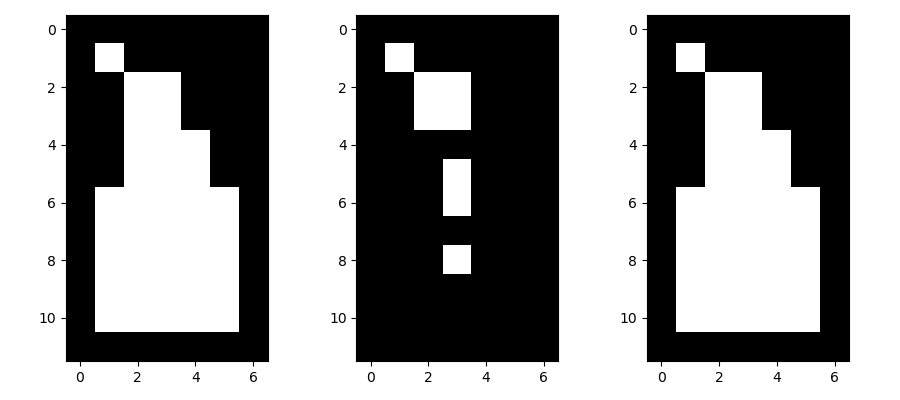

In [21]:
plt.figure(figsize=(9, 4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_esq, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_rec, cmap='gray')

plt.tight_layout()
plt.show()

## Poda
----

- Os métodos de poda são utilizados como pós-processamento para limpar componentes parasitas. 
- Um forma de realizar a poda consiste em:
    - Afinar um conjunto original A, por uma sequencia de EE projetados para detectar extremidades, {B}: \
$X_1 = A \otimes \lbrace B \rbrace$ 
        - (Repetir N vezes de acordo com o tamanho dos elementos que devem ser podados).
    - Para restaurar o conjunto $A$ sem as ramificações parasitas, primeiro é necessário detectar as extremidades de $X_1$ utilizando hit-or-miss: \
$X_2 = \bigcup\limits_{k=1}^{8}{(X_1 \oplus B^k)}$ 
    - Realizar a dilatação condicional de $X_2$ por um EE 3x3 de 1's, $H$, condicionado ao conjunto original $A$: \
$X_3 = (X_2 \oplus H) \cap A$ 
        - (Repetir N vezes). 
    - O resultado final é a união entre $X_1$ e $X_3$: \
$X_4 = X_1 \cup X_3$ 

In [22]:
ee_fg = np.array([[0, 0, 0],
                  [1, 1, 0],
                  [0, 0, 0]])
ee_bg = np.array([[0, 1, 1],
                  [0, 0, 1],
                  [0, 1, 1]])

ee_d_fg = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
ee_d_bg = np.array([[0, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]])

# Gera duas listas com os 8 elementos estrurantes.
# Os demais EE são gerados rotacionando o EE e o EE diagonal 90 graus quatro vezes.
ee_fg_list = [ee_fg, ee_d_fg]
ee_bg_list = [ee_bg, ee_d_bg]

for i in range(3):
    ee_temp_fg = np.rot90(ee_fg_list[-2])
    ee_temp_bg = np.rot90(ee_bg_list[-2])
    
    ee_fg_list.append(ee_temp_fg)
    ee_bg_list.append(ee_temp_bg)
    
    ee_temp_fg = np.rot90(ee_fg_list[-2])
    ee_temp_bg = np.rot90(ee_bg_list[-2])
    
    ee_fg_list.append(ee_temp_fg)
    ee_bg_list.append(ee_temp_bg)

### Plota os elementos estruturantes

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


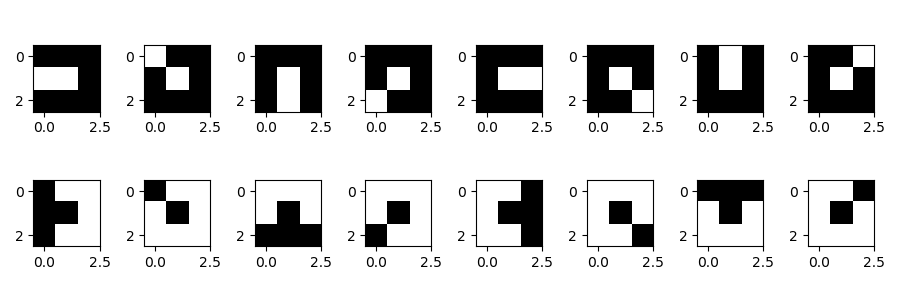

In [23]:
fig, ax  = plt.subplots(2, 8, figsize=(9, 3))

for i, (ee_fg_temp, ee_bg_temp) in enumerate(zip(ee_fg_list, ee_bg_list)):
    img_ = ax[0, i].imshow(ee_fg_temp, cmap='gray')
    img_ = ax[1, i].imshow(ee_bg_temp, cmap='gray')
    
plt.tight_layout()
plt.show()

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


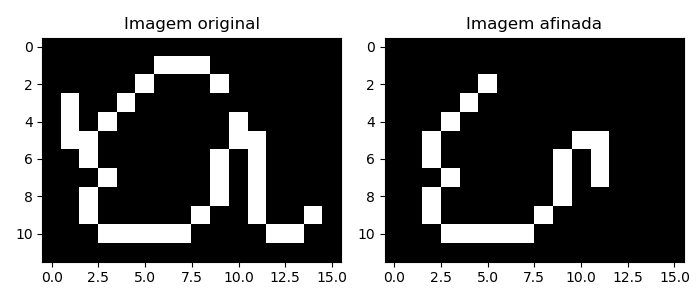

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


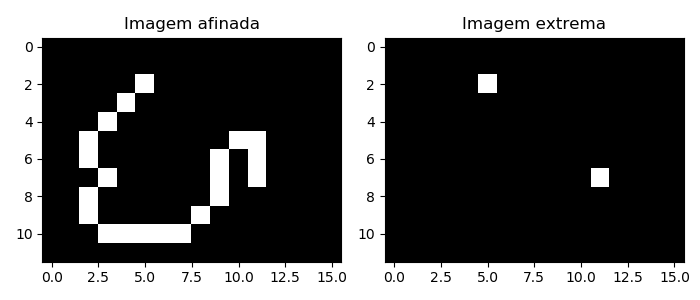

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


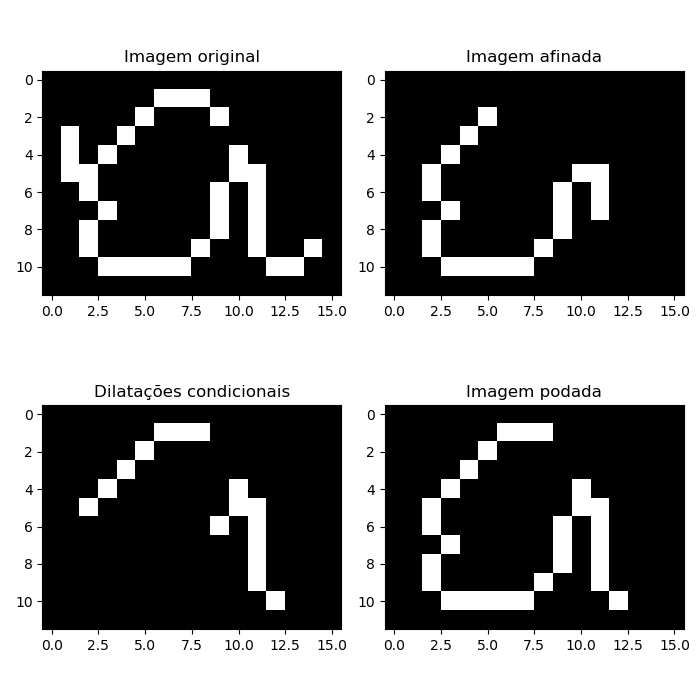

In [24]:
def poda(img_, ciclos=3, plot=True):
    """
    """
    
    # Aplica uma sequencia de afinamentos sobre a imagem original.
    img_afina = img_.astype(bool)
    for i in range(ciclos):
        for ee_fg, ee_bg in zip(ee_fg_list, ee_bg_list):
            img_afina = np.logical_xor(img_afina, ndimage.binary_hit_or_miss(img_afina, ee_fg, ee_bg))

    if plot:
        plt.figure(figsize=(7,3))
        plt.subplot(1,2,1)
        plt.imshow(img_, cmap='gray')
        plt.title('Imagem original')
        plt.subplot(1,2,2)
        plt.imshow(img_afina, cmap='gray')
        plt.title('Imagem afinada')
        plt.tight_layout()
        plt.show()
    
    # Inicializa imagem com os extremos do resultado do afinamento.
    img_extrem = np.zeros(img_.shape, dtype=bool)

    for ee_fg, ee_bg in zip(ee_fg_list, ee_bg_list):
        # Extremos detectados com o EE atual.
        img_extrem_temp = ndimage.binary_hit_or_miss(img_afina, ee_fg, ee_bg)
        # Extremos detectados são combinados na imagem final.
        img_extrem = np.logical_or(img_extrem, img_extrem_temp)

    if plot: # Plota as imagens dos resultados parciais.
        plt.figure(figsize=(7,3))
        plt.subplot(1,2,1)
        plt.imshow(img_afina, cmap='gray')
        plt.title('Imagem afinada')
        plt.subplot(1,2,2)
        plt.imshow(img_extrem, cmap='gray')
        plt.title('Imagem extrema')
        plt.tight_layout()
        plt.show()
        
    # Dilatação condicional dos pontos extremos em relação o objeto original
    img_dil = img_extrem
    for i in range(ciclos):
        img_dil = morphology.binary_dilation(img_dil, np.ones([3,3]))
        img_dil = np.logical_and(img_dil, img_)
        
    # União do afinamento com o resultado das dilatações condicionais
    img_poda = np.logical_or(img_afina, img_dil)

    if plot:
        plt.figure(figsize=(7,7))
        plt.subplot(2,2,1)
        plt.imshow(img_, cmap='gray')
        plt.title('Imagem original')
        plt.subplot(2,2,2)
        plt.imshow(img_afina, cmap='gray')
        plt.title('Imagem afinada')
        plt.subplot(2,2,3)
        plt.imshow(img_dil, cmap='gray')
        plt.title('Dilatações condicionais')
        plt.subplot(2,2,4)
        plt.imshow(img_poda, cmap='gray')
        plt.title('Imagem podada')
        plt.tight_layout()
        plt.show()
    
    # Retorna a imagem podada
    return img_poda

# Aplica a poda
# --------------------
img_poda = poda(img_6)

### Plota os resultados

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


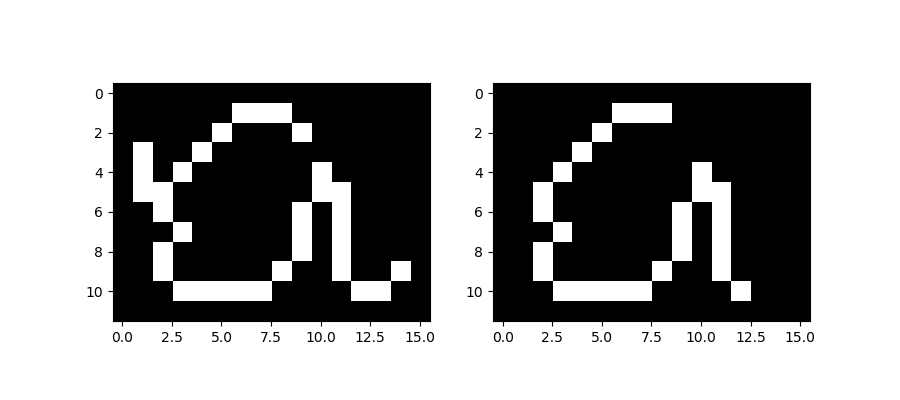

In [25]:
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
plt.imshow(img_6, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img_poda, cmap='gray')

plt.show()

## Bibliografia
----

MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.

    Disponível para download no site do autor (Exclusivo para uso pessoal)

    http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

    Disponível na Biblioteca Virtual da Pearson.

J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.

    http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

Prof. Aldo von Wangenheim. Morfologia Matemática

    http://www.inf.ufsc.br/~visao/morfologia.pdf

Prof. James Facon. A Morfologia Matemática e suas Aplicações em Processamento de Imagens - Minicurso – WVC 2011
    
    http://www.ppgia.pucpr.br/~facon/Books/2011WVCMinicurso2Morfo.pdf 

Universidade de Waterloo. Image Repository.

    http://links.uwaterloo.ca/Repository.html
    
The USC-SIPI Image Database.    
    
    http://sipi.usc.edu/database/database.php
    
Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    
    Disponível em: http://scipy-lectures.org/

scikit-image. Documentação.

    https://scikit-image.org/docs/dev/index.html

scikit-image. Documentação. Módulo 'morphology'. 
    
    https://scikit-image.org/docs/dev/api/skimage.morphology.html
    
Morphological Filtering 
    
    https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html
    
OpenCV. Hit-or-Miss.

    https://docs.opencv.org/3.4/db/d06/tutorial_hitOrMiss.html
    
NumPy. Documentação.

    https://numpy.org/doc/stable/